In [1]:
import numpy
from numpy import real, imag, nan
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
color_A = plt.cm.viridis(.3)
color_B = plt.cm.viridis(.85)

In [3]:
plt.rcParams.update({'font.size': 20})

In [4]:
filepath = '../tracking-output/simulated_PRN-10_PLL-BW-20.mat'

In [5]:
data = loadmat(filepath)

# Extract data
time = data['time'][0]
prn = data['prn'][0][0]
acq_correlation = data['acq_correlation']
acq_doppler_bins = data['acq_doppler_bins'][0]

n0 = data['n0'][0][0]
fs_IF = data['fs_IF'][0][0]
f_center = data['f_center_IF'][0][0]
B_DLL = data['B_DLL'][0][0]
B_PLL = data['B_PLL'][0][0]

prompt = data['prompt'][0]
code_phase_truth = data['code_phase_truth'][0]
carrier_phase_truth = data['carrier_phase_truth'][0]
doppler_freq_truth = data['doppler_freq_truth'][0]
code_phase = data['code_phase'][0]
measured_code_phase = data['measured_code_phase'][0]
filtered_code_phase = data['filtered_code_phase'][0]
carrier_phase = data['carrier_phase'][0]
measured_carrier_phase = data['measured_carrier_phase'][0]
filtered_carrier_phase = data['filtered_carrier_phase'][0]
doppler_freq = data['doppler_freq'][0]
measured_doppler_freq = data['measured_doppler_freq'][0]
filtered_doppler_freq = data['filtered_doppler_freq'][0]

In [6]:
# Set parameters for GPS L1CA signal
f_carrier = 1.57542e9           # L1 carrier frequency (Hz)
f_code = 1.023e6                # L1 C/A code rate (chips/s)

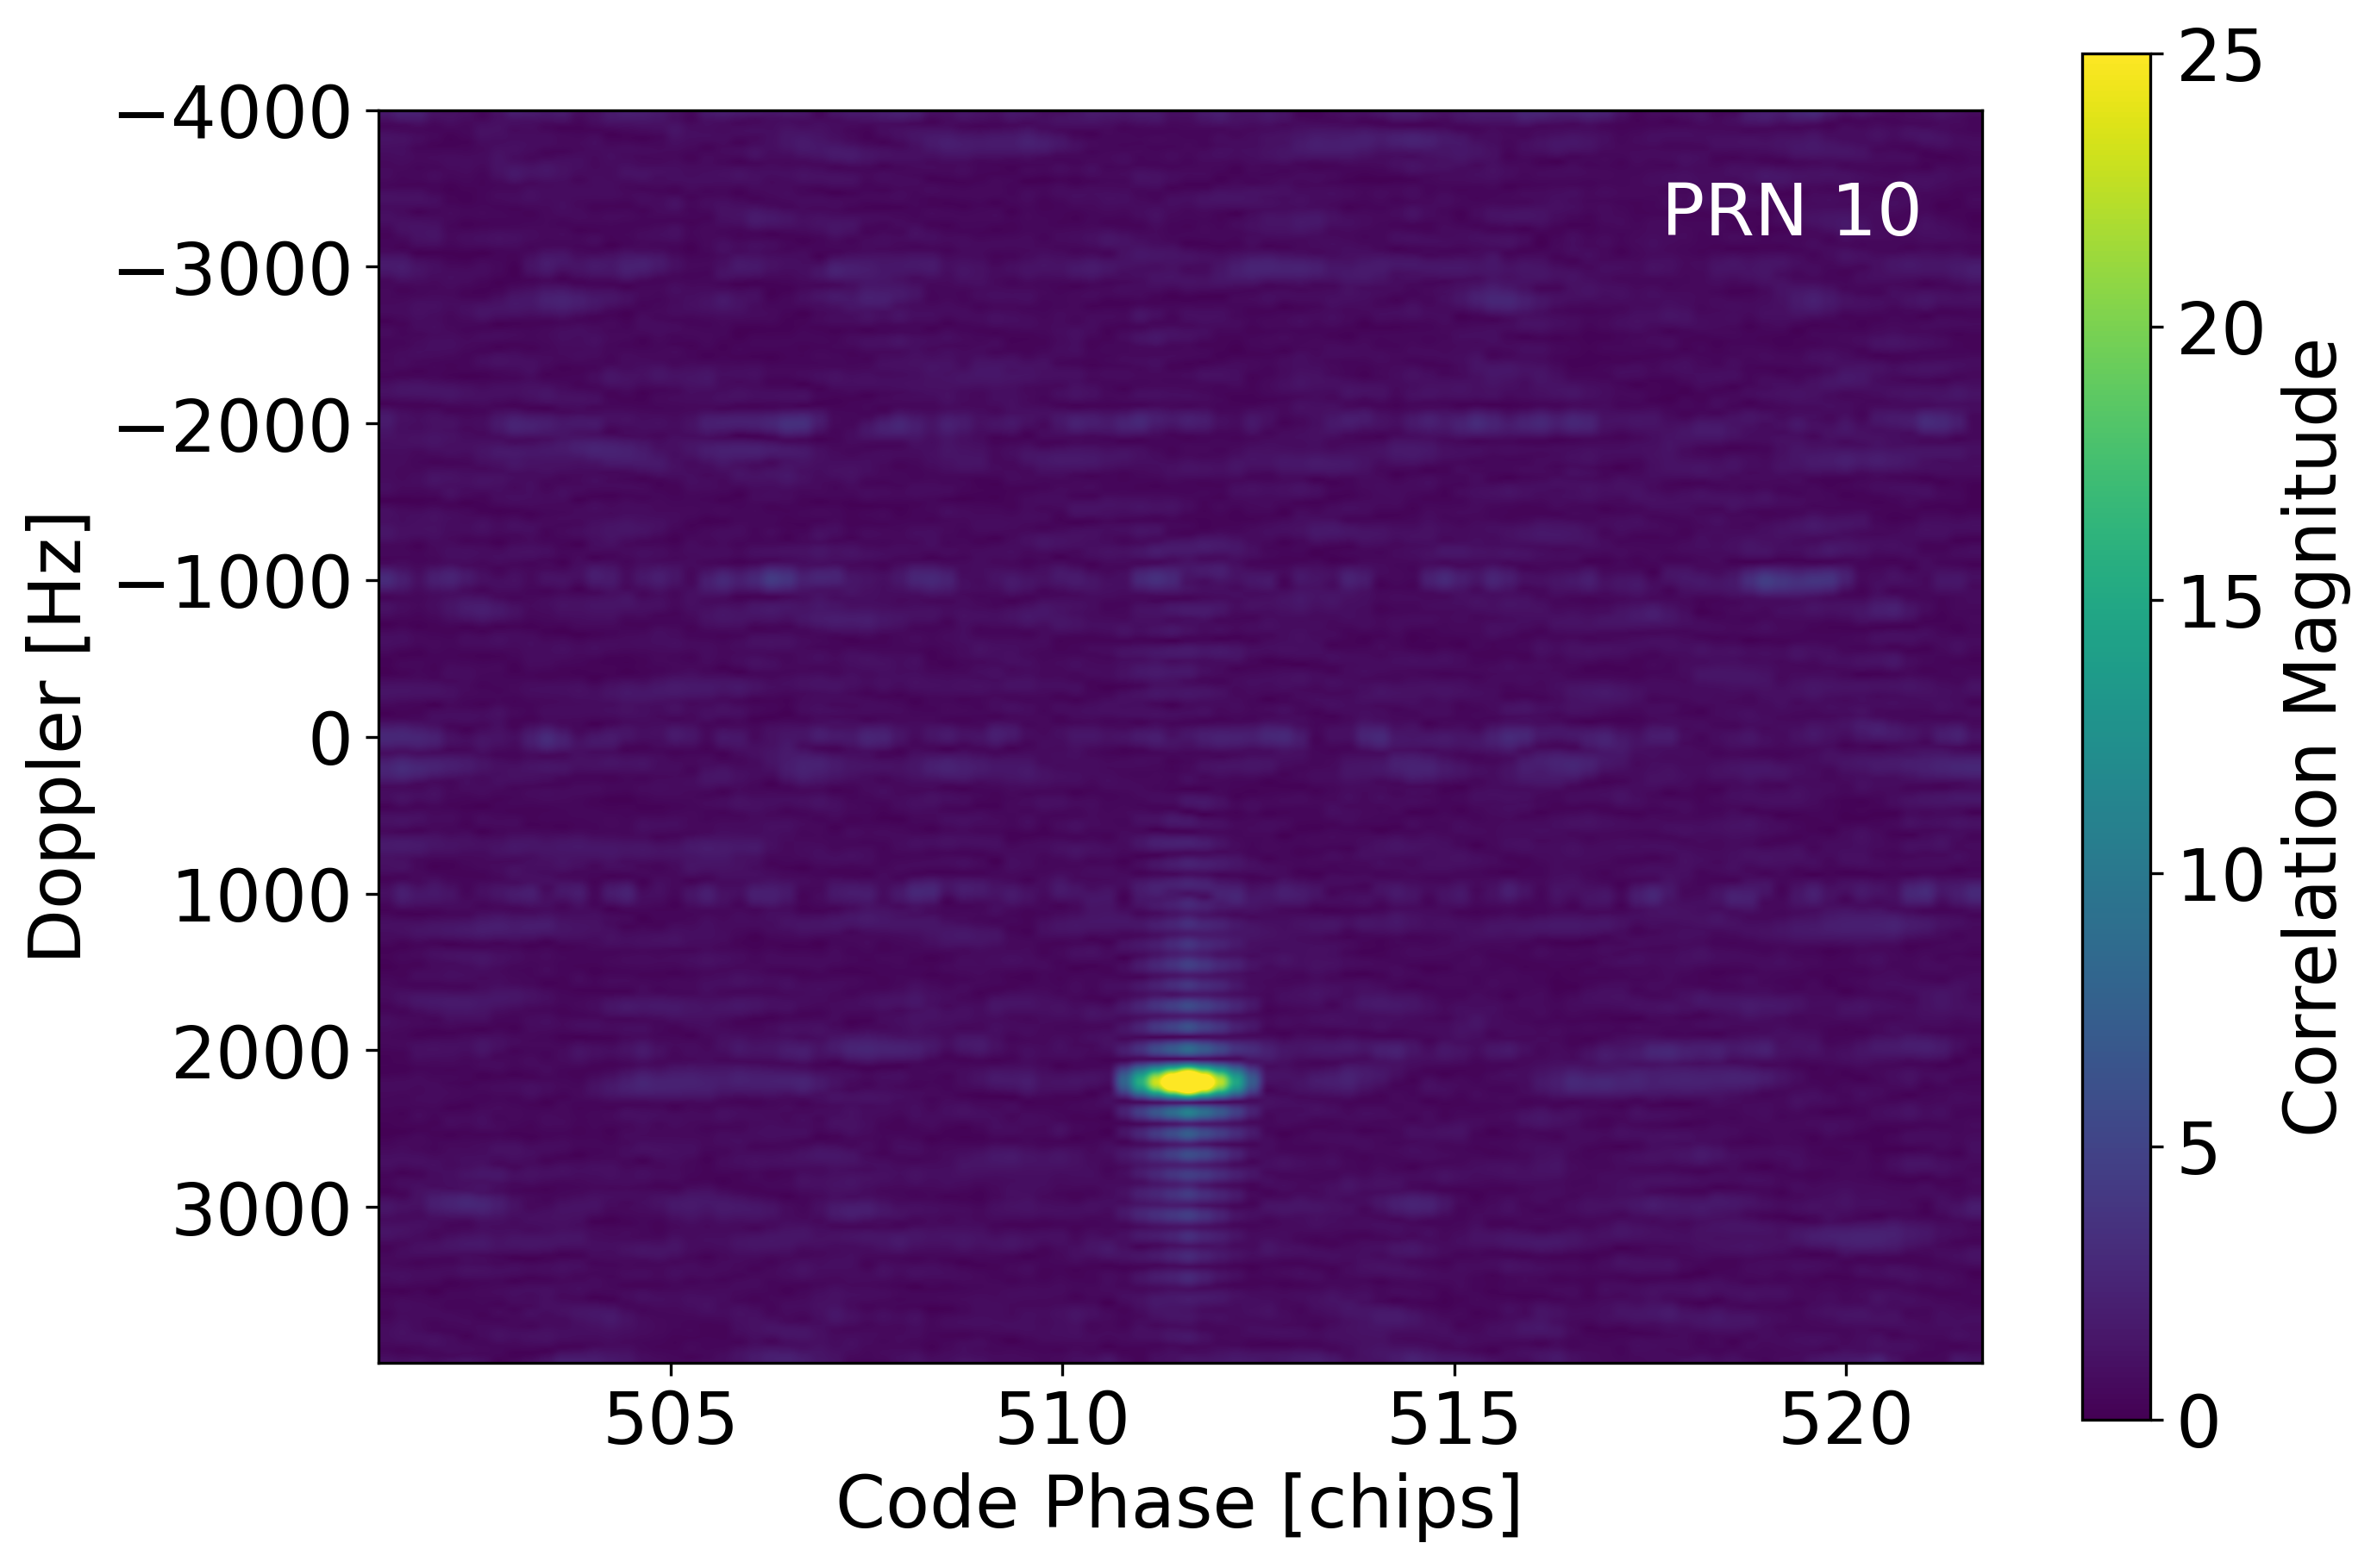

In [7]:
fig = plt.figure(figsize=(10, 7), dpi=300)
ax = fig.add_subplot(111)
k = 50
i0, i1 = max([0, n0 - k]), min([acq_correlation.shape[1], n0 + k])
truncated_corr = acq_correlation[:, i0:i1]
truncated_corr /= numpy.std(truncated_corr)
extent = (i0 * f_code / fs_IF, i1 * f_code / fs_IF, acq_doppler_bins[-1], acq_doppler_bins[0])
im = ax.imshow(truncated_corr, aspect=.002, extent=extent, vmin=0, vmax=25)
ax.text(.8, .9, 'PRN {0:02}'.format(prn), color='w', transform=ax.transAxes)
cb = plt.colorbar(im)
cb.set_label('Correlation Magnitude')

ax.set_ylabel('Doppler [Hz]')
ax.set_xlabel('Code Phase [chips]')
plt.show()

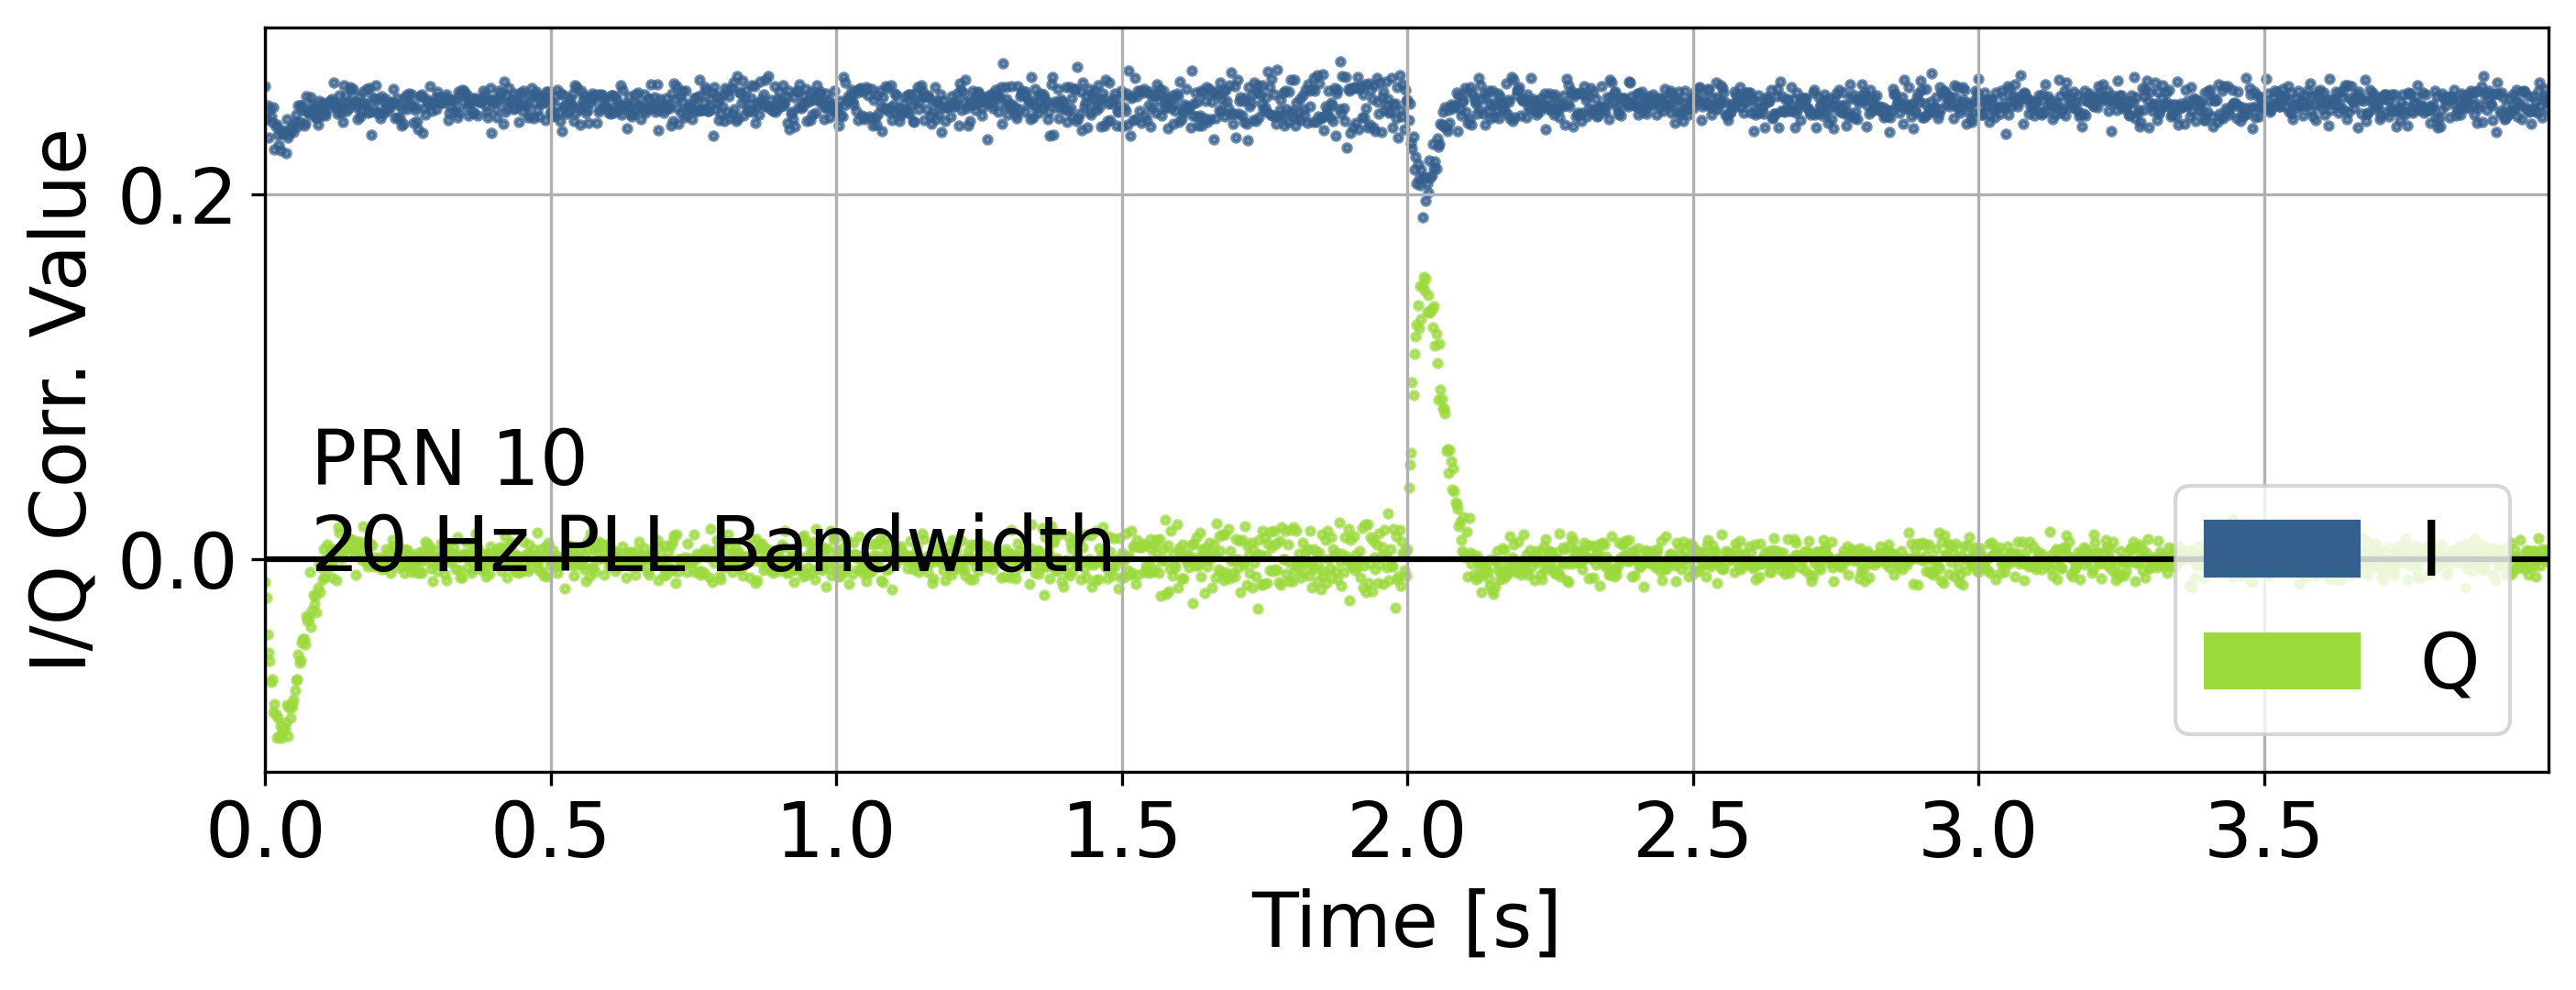

In [8]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(111)
args = {'s': 4, 'alpha': .7}
ax.scatter(time, real(prompt), color=color_A, **args)
ax.scatter(time, imag(prompt), color=color_B, **args)
ax.plot((time[0], time[-1]), (0, 0), color='k')
ax.set_xlim(time[0], time[-1])
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('I/Q Corr. Value')
ax.legend([plt.Rectangle((nan, nan), 1, 1, color=c) for c in [color_A, color_B]], ['I', 'Q'], loc=4)
ax.text(.02, .27, 'PRN {0:02}\n{1:02} Hz PLL Bandwidth'.format(prn, B_PLL), transform=ax.transAxes)
plt.tight_layout()
plt.show()

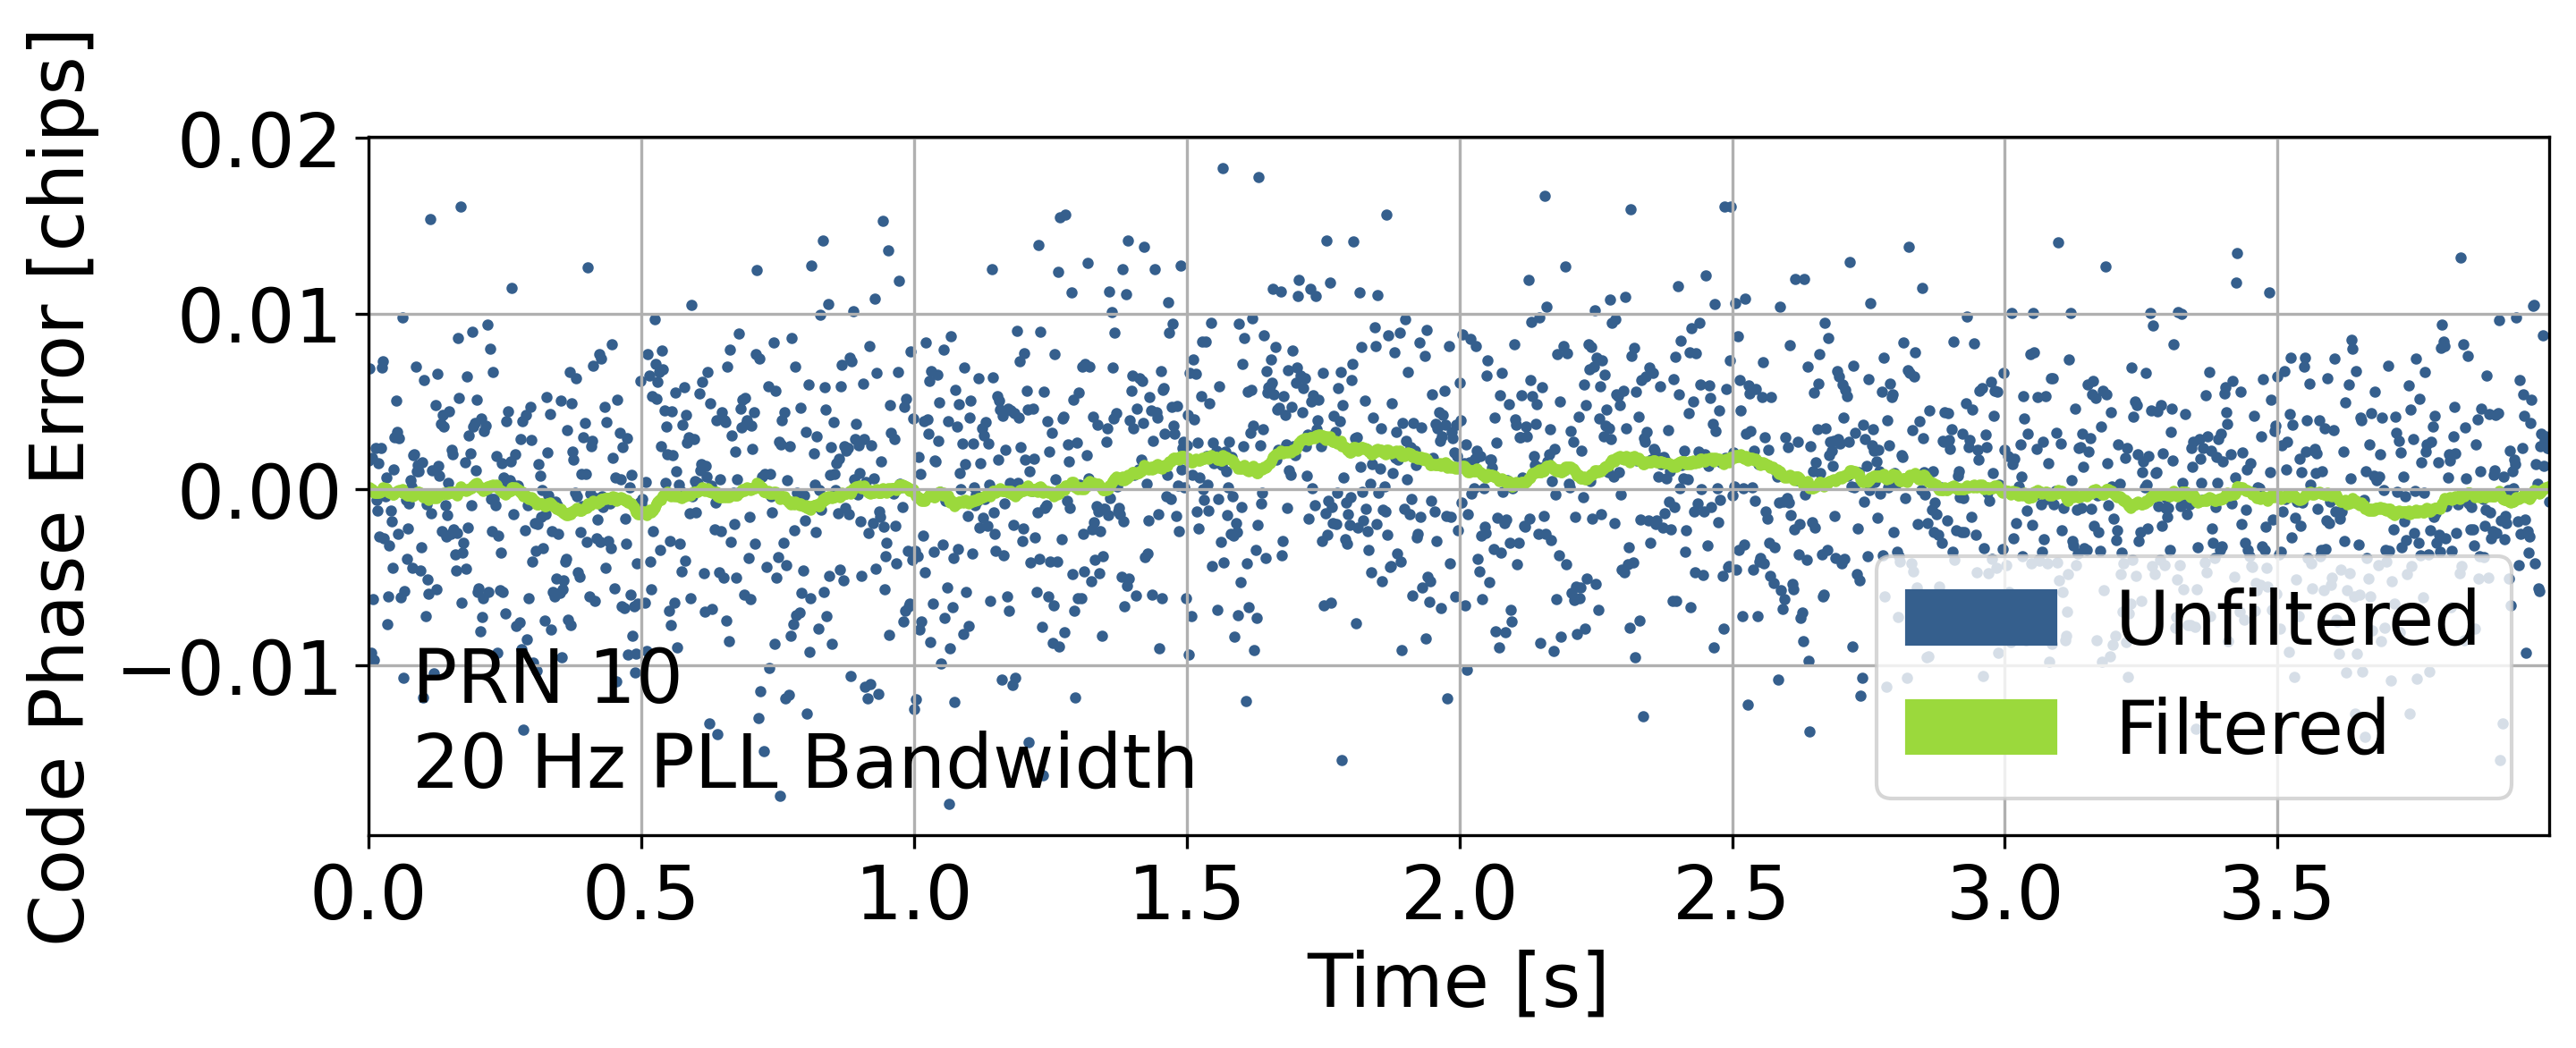

In [9]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(111)
args = {'s': 4, 'alpha': 1}
ax.scatter(time, measured_code_phase - code_phase_truth, color=color_A, **args)
ax.scatter(time, filtered_code_phase - code_phase_truth, color=color_B, **args)
ax.set_xlim(time[0], time[-1])
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Code Phase Error [chips]')
ax.legend([plt.Rectangle((nan, nan), 1, 1, color=c) for c in [color_A, color_B]], ['Unfiltered', 'Filtered'], loc=4)
ax.text(.02, .07, 'PRN {0:02}\n{1:02} Hz PLL Bandwidth'.format(prn, B_PLL), transform=ax.transAxes)
plt.tight_layout()
plt.show()

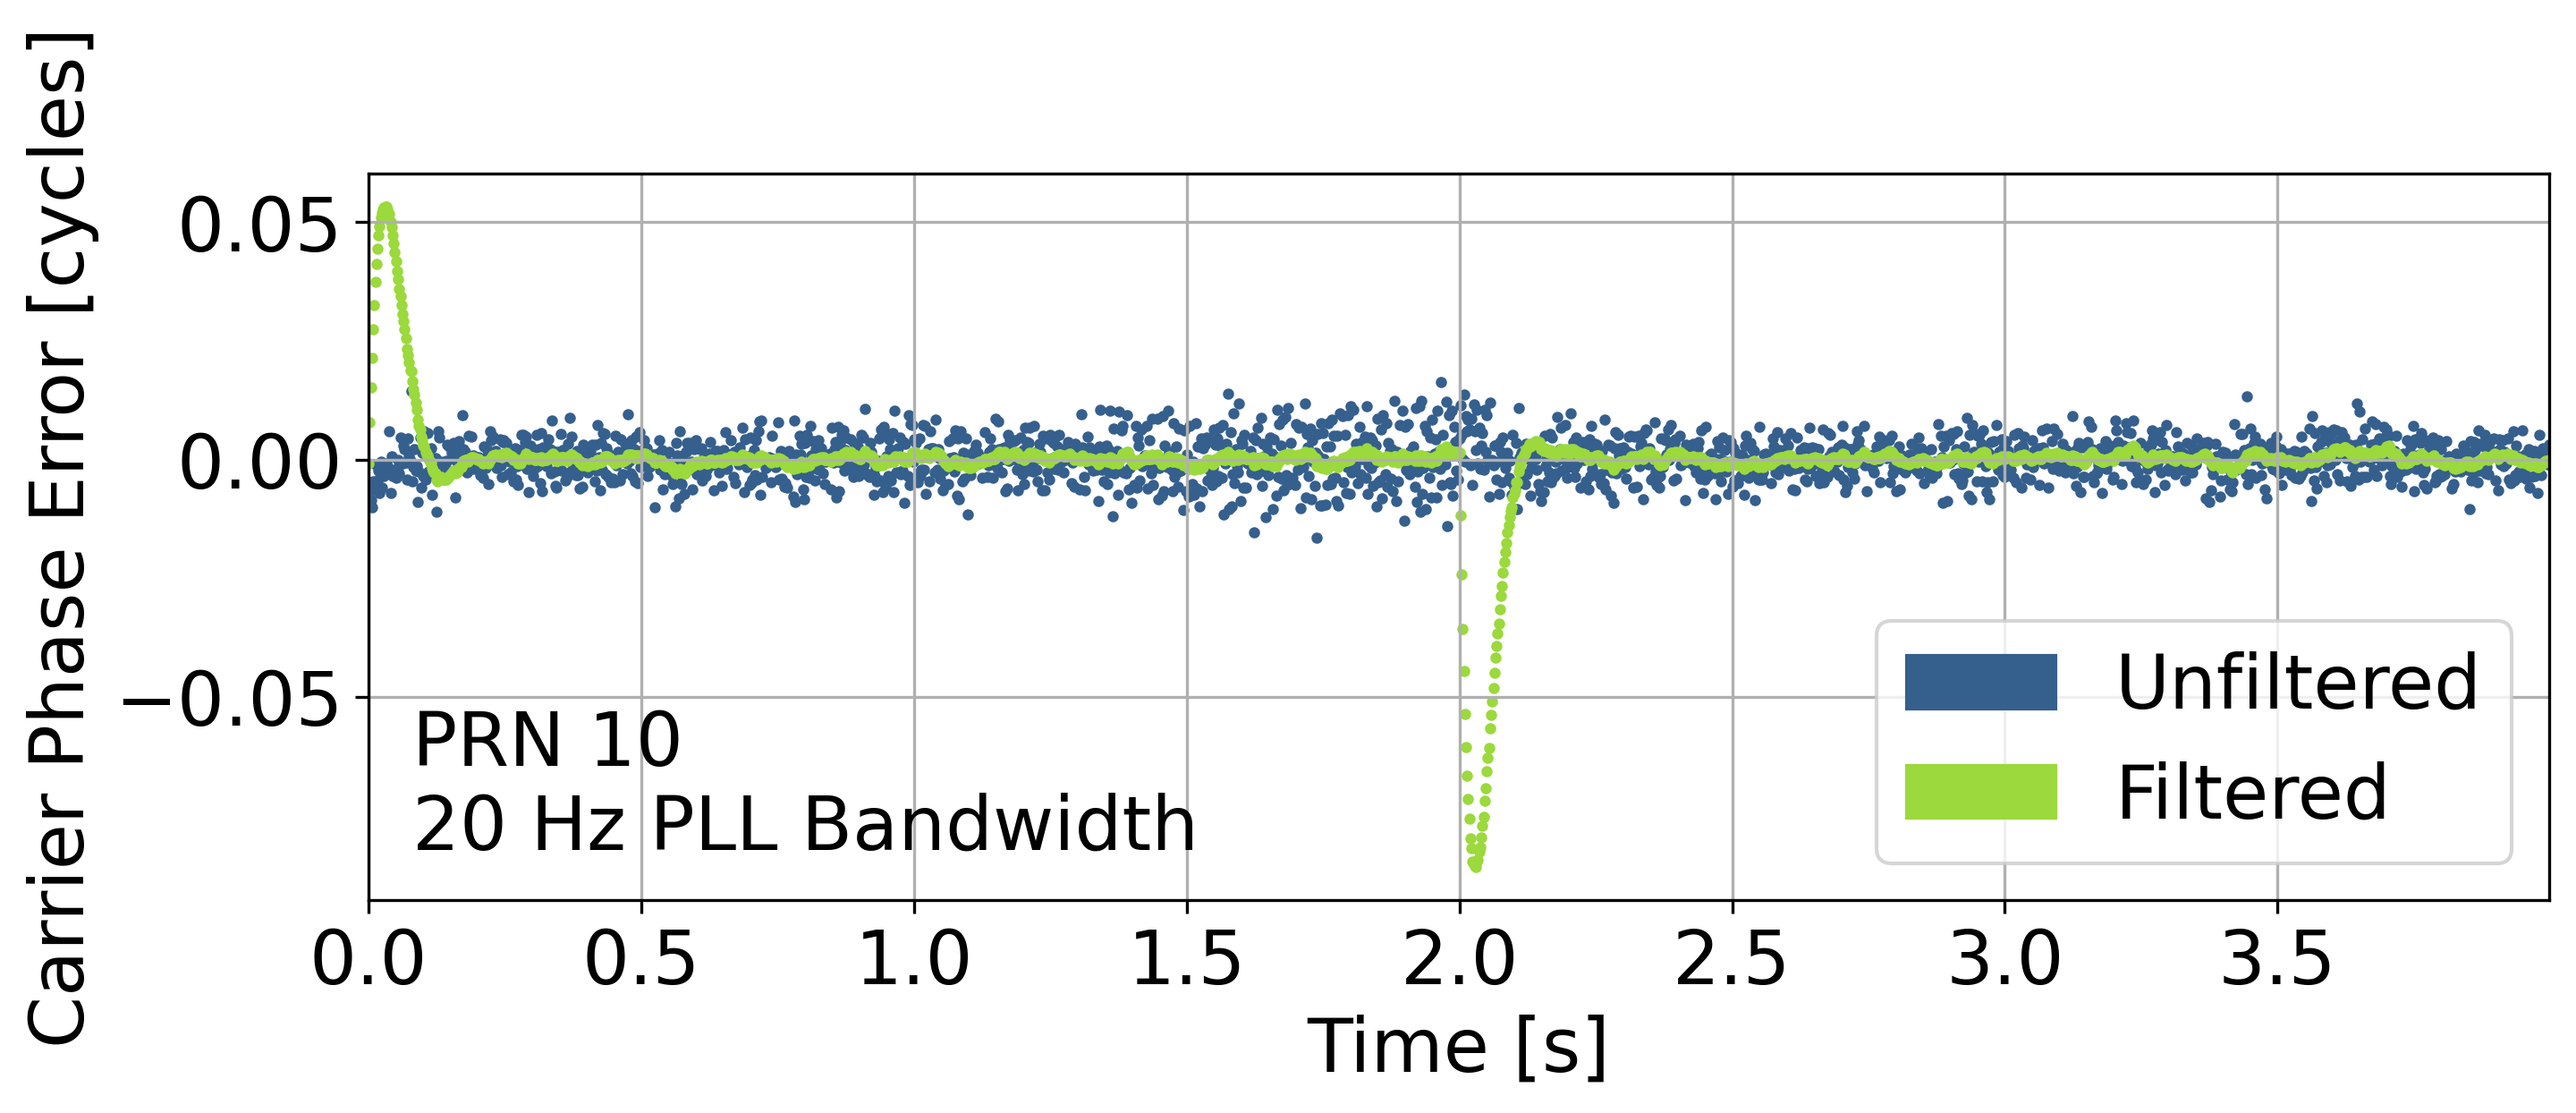

In [10]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(111)
args = {'s': 4, 'alpha': 1}
ax.scatter(time, measured_carrier_phase - carrier_phase_truth, color=color_A, **args)
ax.scatter(time, filtered_carrier_phase - carrier_phase_truth, color=color_B, **args)
ax.set_xlim(time[0], time[-1])
# ax.set_ylim(-10, 1)
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Carrier Phase Error [cycles]')
ax.legend([plt.Rectangle((nan, nan), 1, 1, color=c) for c in [color_A, color_B]], ['Unfiltered', 'Filtered'], loc=4)
ax.text(.02, .07, 'PRN {0:02}\n{1:02} Hz PLL Bandwidth'.format(prn, B_PLL), transform=ax.transAxes)
plt.tight_layout()
plt.show()

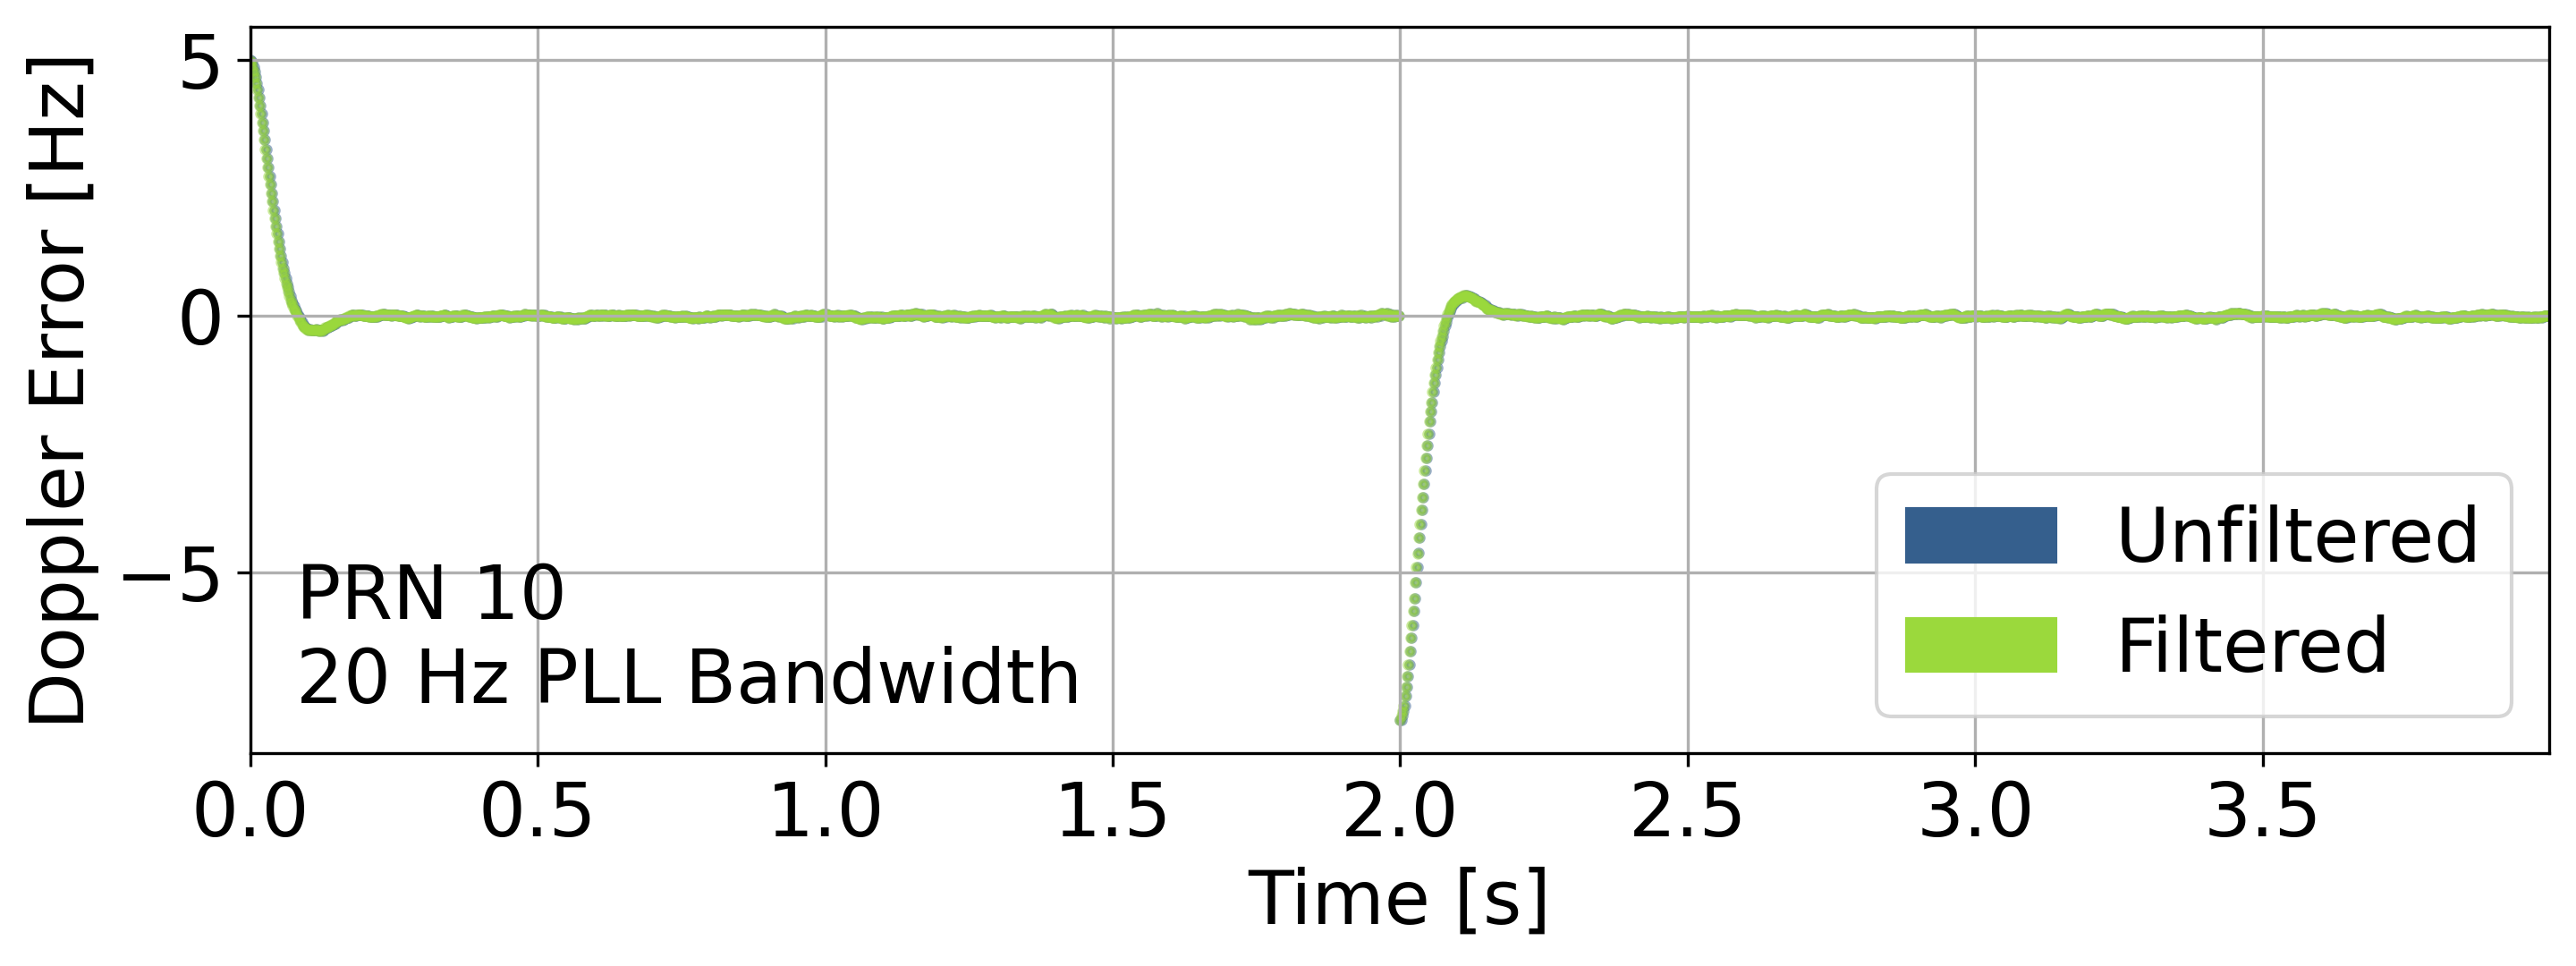

In [11]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(111)
args = {'s': 4, 'alpha': .5}
ax.scatter(time, measured_doppler_freq - doppler_freq_truth, color=color_A, **args)
ax.scatter(time, filtered_doppler_freq - doppler_freq_truth, color=color_B, **args)
ax.set_xlim(time[0], time[-1])
# ax.set_ylim(-1, 1)
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Doppler Error [Hz]')
ax.legend([plt.Rectangle((nan, nan), 1, 1, color=c) for c in [color_A, color_B]], ['Unfiltered', 'Filtered'], loc=4)
ax.text(.02, .07, 'PRN {0:02}\n{1:02} Hz PLL Bandwidth'.format(prn, B_PLL), transform=ax.transAxes)
plt.tight_layout()
plt.show()

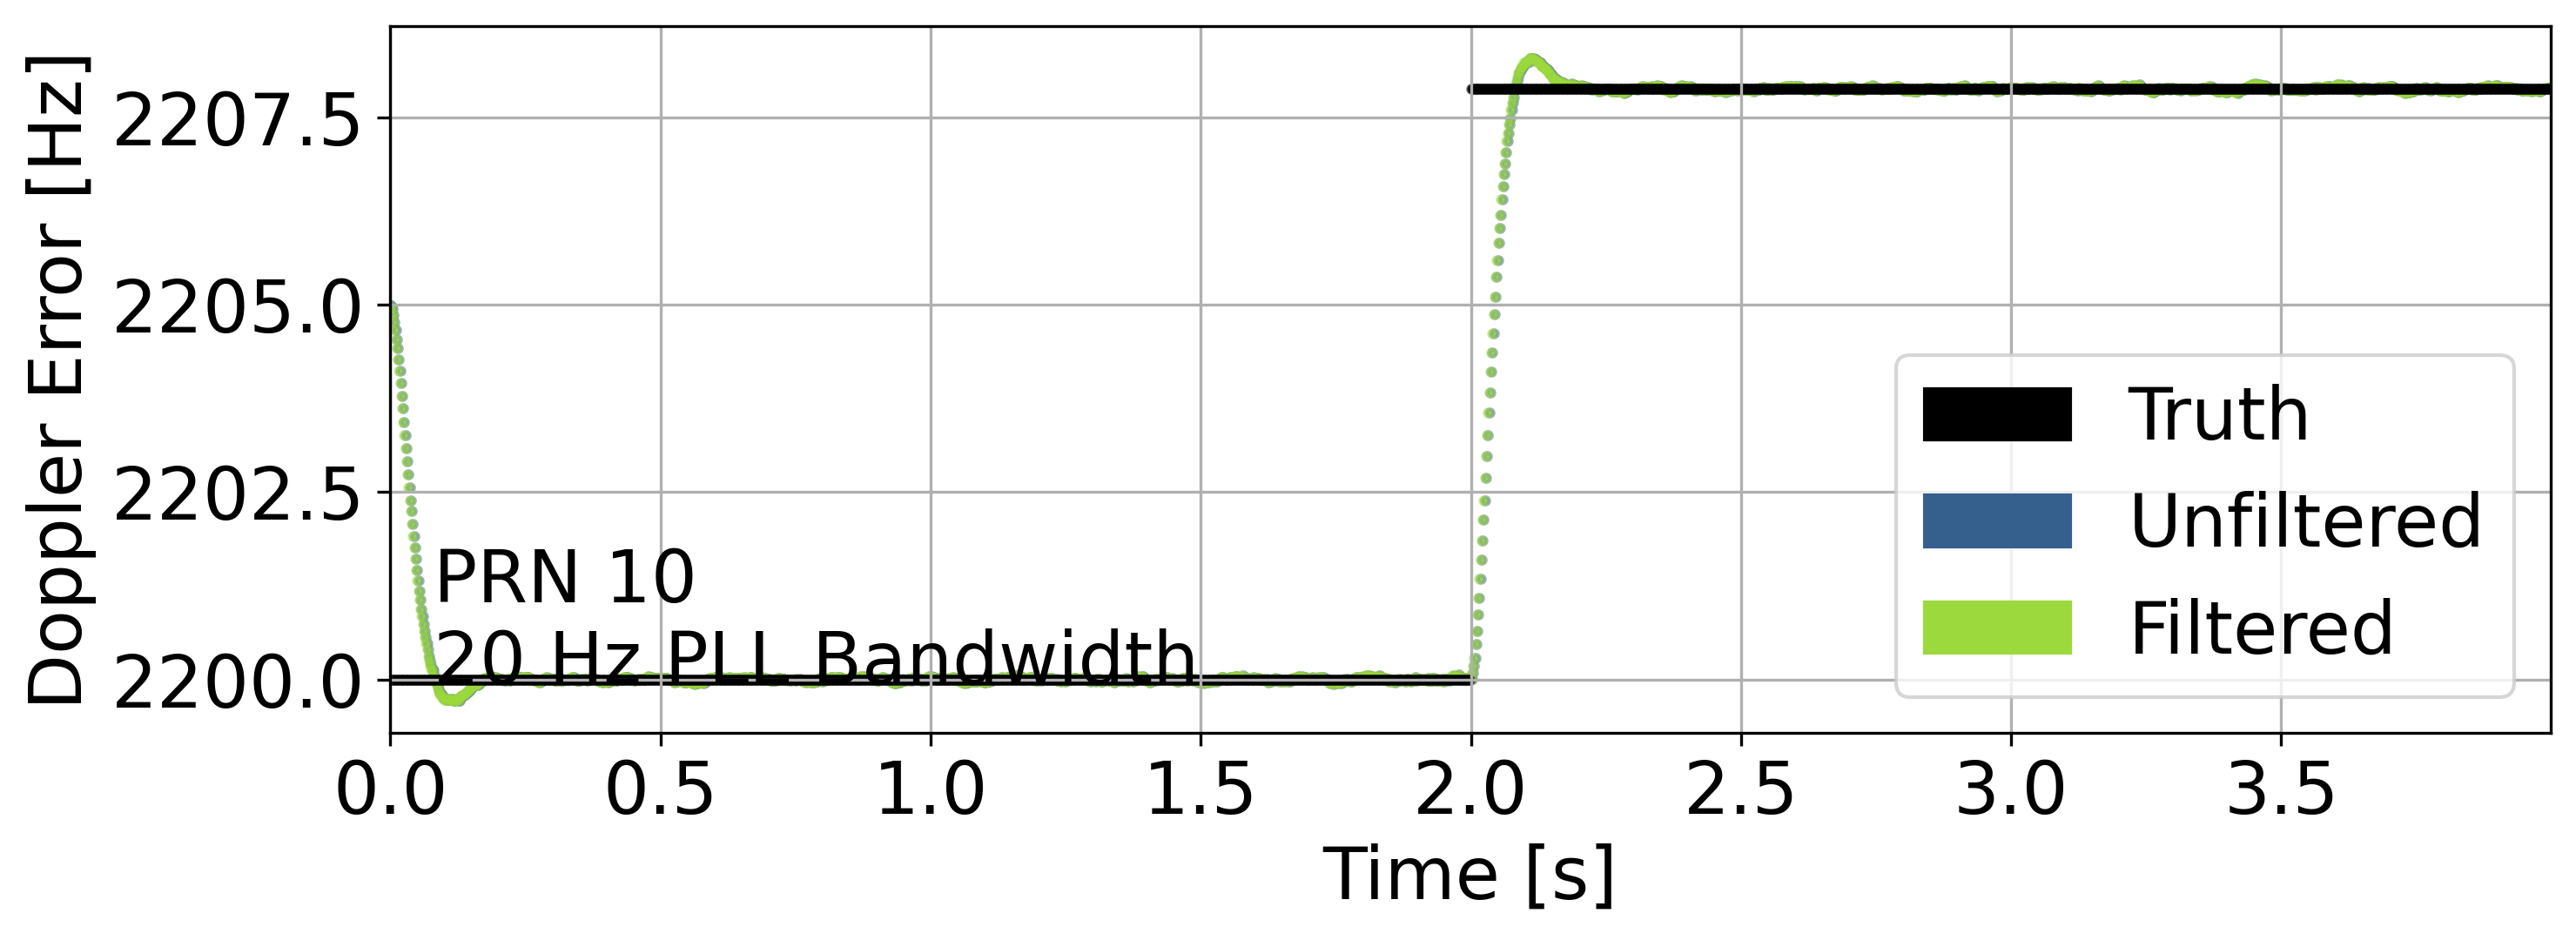

In [12]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(111)
args = {'s': 4, 'alpha': .5}
ax.scatter(time, measured_doppler_freq, color=color_A, **args)
ax.scatter(time, filtered_doppler_freq, color=color_B, **args)
ax.scatter(time, doppler_freq_truth, color='k', **args)
ax.set_xlim(time[0], time[-1])
# ax.set_ylim(-1, 1)
ax.grid()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Doppler Error [Hz]')
ax.legend([plt.Rectangle((nan, nan), 1, 1, color=c) for c in ['k', color_A, color_B]], ['Truth', 'Unfiltered', 'Filtered'], loc=4)
ax.text(.02, .07, 'PRN {0:02}\n{1:02} Hz PLL Bandwidth'.format(prn, B_PLL), transform=ax.transAxes)
plt.tight_layout()
plt.show()